# Meetup Websocket Stream Capture

#### Data Engieering sample project obtaining real data and using for analysis. Using RSVP of members from popular [Meetup](https://www.meetup.com/) online platform.  
#### Real world example where production would use cloud technology to save the unstructured data and use distributed computing for GB/PB size datasets. Out dataset will be small to demo.
##*Getting the data*
- open Google Chrome tab
- paste url: http://stream.meetup.com/2/rsvps (don't hit enter quite yet)
- Go to "Customize and control Google Chome"..."More Tools"..."Developer Tools"...under "Networking" tab...click WS (websockets)...Show Overview On
- Hit Enter
- Observe the time and wait untill a minute passes
- CTRL-A to select all...CTRL-C for copy...open notepad or any text editor...CTRL-V for paste and save as as meetup.txt 

##*Load the file into Google Colab*
- Login to Google Drive or sign up for a gmail account
- open Google Colab through New...More...Google Claboratory 
- Create new .ipynb file
- go to Folder icon and upload the data file

##*Learn more for free*
- [Kaggle](https://www.kaggle.com/learn/overview)
- [LA Country Library](https://lacountylibrary.org/learn/)
- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Google Machine Learning](https://developers.google.com/machine-learning/crash-course/)



In [2]:
# Importing libraries 
import pandas as pd
import matplotlib
import json
from pandas import json_normalize
import os
from os import path


In [3]:
# Loading the file and creating a dataframe, first step to structure the data
# file_path = path.relpath("meetup_data.txt")
with open("meetup_data.txt", "r", encoding="utf-8") as json_file:      
    data = json_file.readlines()
    data = list(map(json.loads, data)) 
meetup_df = pd.DataFrame(data)
meetup_df


,venue,visibility,response,guests,member,rsvp_id,mtime,event,group
0,"{'venue_name': 'Bard & Banker (Scottish Pub)',...",public,yes,0,"{'member_id': 233634505, 'other_services': {'t...",1840881698,1592080526648,{'event_name': 'Monthly Social at the Bard and...,"{'group_topics': [{'urlkey': 'webdesign', 'top..."
1,"{'venue_name': 'Online event', 'lon': 179.1962...",public,yes,0,"{'member_id': 306172148, 'photo': 'https://sec...",1840881699,1592080527251,"{'event_name': 'UX3B Bueno, Bonito, Barato. D...","{'group_topics': [{'urlkey': 'softwaredev', 't..."
2,"{'venue_name': 'Online event', 'lon': 179.1962...",public,yes,0,"{'member_id': 311087950, 'photo': 'https://sec...",1840881700,1592080527676,"{'event_name': 'MotMeetupTour - ""DEV+QA not an...","{'group_topics': [{'urlkey': 'softwaredev', 't..."
3,"{'venue_name': 'Bard & Banker (Scottish Pub)',...",public,yes,0,"{'member_id': 233634505, 'other_services': {'t...",1840881698,1592080527000,{'event_name': 'Monthly Social at the Bard and...,"{'group_topics': [{'urlkey': 'webdesign', 'top..."
4,NaN,public,yes,5,"{'member_id': 7903615, 'photo': 'https://secur...",1771140061,1592080527835,"{'event_name': 'Daytime Card Class', 'event_id...","{'group_topics': [{'urlkey': 'craftswap', 'top..."
...,...,...,...,...,...,...,...,...,...
255,{'venue_name': 'Online Event - TheFunSingles.c...,public,yes,0,"{'member_id': 289412859, 'photo': 'https://sec...",1840881976,1592080795631,{'event_name': 'Online Speed Dating - Singles ...,{'group_topics': [{'urlkey': 'culture-exchange...
256,{'venue_name': 'Online Event - TheFunSingles.c...,public,yes,12,"{'member_id': 289412859, 'photo': 'https://sec...",1840881976,1592080795814,{'event_name': 'Online Speed Dating - Singles ...,{'group_topics': [{'urlkey': 'culture-exchange...
257,"{'venue_name': 'Online event', 'lon': 179.1962...",public,yes,0,"{'member_id': 1237791, 'photo': 'https://secur...",1840881977,1592080795952,{'event_name': 'Earth Circle 8-Session Series:...,"{'group_topics': [{'urlkey': 'hiking', 'topic_..."
258,"{'venue_name': 'Online event', 'lon': 179.1962...",public,yes,0,"{'member_id': 23690981, 'photo': 'https://secu...",1840881978,1592080795987,"{'event_name': 'Dealmakers Subgroup', 'event_i...",{'group_topics': [{'urlkey': 'professional-net...


In [4]:
# flattening the schema to create more tables
event = pd.json_normalize(meetup_df['event'])
event.head()

,event_name,event_id,time,event_url
0,Monthly Social at the Bard and Banker,rvhddqyccgbkb,1617840000000,https://www.meetup.com/UX-Victoria/events/2712...
1,"UX3B Bueno, Bonito, Barato. Desmitificando có...",271169788,1592431200000,https://www.meetup.com/Women-Who-Code-Buenos-A...
2,"MotMeetupTour - ""DEV+QA not an odd couple""",270991433,1592496000000,https://www.meetup.com/Ministry-of-Testing-Bar...
3,Monthly Social at the Bard and Banker,rvhddqyccgbkb,1617840000000,https://www.meetup.com/UX-Victoria/events/2712...
4,Daytime Card Class,vtrkdrybcpbbc,1605893400000,https://www.meetup.com/Pretty-Papers/events/25...


In [5]:
# selecting only the event names and counting, automatic sorting
event['event_name'].value_counts()


Make New Friends - Singles Mixer (36-47)                                 12
Online Speed Dating - Single Professionals (26-38)                        8
Monthly Social at the Bard and Banker                                     8
Earth Circle 8-Session Series: Connect with the Nature Mystic in You!     8
Two Night Backpacking Trip on Mt. Hood's N / NW Side                      4
                                                                         ..
Cingles de Bertí, from/desde la Garriga to Figaró - Hiking/Senderismo     1
Designing Your Work Life: Mindset, Grit, and the ARC of Your Career       1
Using Doodly to Grow Your Visibility                                      1
MotMeetupTour - "DEV+QA not an odd couple"                                1
Sunday Afternoon 3.5  & above at WJ -doubles format                       1
Name: event_name, Length: 176, dtype: int64

In [6]:
member = pd.json_normalize(meetup_df['member'])
print(len(member))
member.head()

260


,member_id,photo,member_name,other_services.twitter.identifier,other_services.facebook.identifier
0,233634505,https://secure.meetupstatic.com/photos/member/...,Shane,@csGoodman,10159164933783916
1,306172148,https://secure.meetupstatic.com/photos/member/...,Gita Magaña,NaN,NaN
2,311087950,https://secure.meetupstatic.com/photos/member/...,Maja Hołyńska,NaN,NaN
3,233634505,https://secure.meetupstatic.com/photos/member/...,Shane,@csGoodman,10159164933783916
4,7903615,https://secure.meetupstatic.com/photos/member/...,Lucinda,NaN,NaN


In [7]:
# how many people were registering for multiple events?
member['member_id'].value_counts()

48669252     12
233634505     8
276217313     6
289164420     6
3639869       6
             ..
275239180     1
10507595      1
226993989     1
278133572     1
209920514     1
Name: member_id, Length: 172, dtype: int64

In [8]:
# flattening nested unstructured data
group = pd.json_normalize(meetup_df['group'], record_path='group_topics', meta=['group_country', 'group_city', 'group_state', 'group_name', 'group_lon', 'group_lat'], errors='ignore')
print(len(group))
group.head()

3060


,urlkey,topic_name,group_country,group_city,group_state,group_name,group_lon,group_lat
0,webdesign,Web Design,ca,Victoria,BC,UX Victoria,-123.45,48.46
1,graphicdesign,Graphic Design,ca,Victoria,BC,UX Victoria,-123.45,48.46
2,ixd,Interaction Design,ca,Victoria,BC,UX Victoria,-123.45,48.46
3,user-experience,User Experience,ca,Victoria,BC,UX Victoria,-123.45,48.46
4,usability,Usability,ca,Victoria,BC,UX Victoria,-123.45,48.46


In [9]:
# what is the most popular topics people attend?
group['topic_name'].value_counts()

Outdoors               61
Social                 60
New In Town            47
Social Networking      43
Hiking                 40
                       ..
Gay Professionals       1
Cruiser Bikes           1
Paranormal Evidence     1
Sword Fighting          1
Tatting                 1
Name: topic_name, Length: 1006, dtype: int64

In [10]:
# what is the most popular topic indicating their country
group[['topic_name', 'group_country']].groupby(['group_country']).topic_name.value_counts().sort_values(ascending=False)

group_country  topic_name      
us             Outdoors            47
               Social              45
               New In Town         34
               Hiking              34
               Singles             30
                                   ..
               Divorce Recovery     1
               Divine Guidance      1
               Dinner Parties       1
               Dinner               1
ar             Blockchain           1
Name: topic_name, Length: 1321, dtype: int64

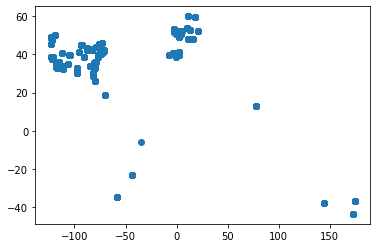

In [11]:
# where are people rsvp'ing from around the world "image a map"
import matplotlib.pyplot as plt
plt.scatter(x=group['group_lon'], y=group['group_lat'])
plt.show()

In [12]:
# filtering us events
us_events = group[group['group_country']=='us']

In [13]:
# filtering cs events
ca_events = us_events[us_events['group_state']=='CA'][['topic_name', 'group_state','group_city']]. \
groupby(['group_state','group_city']).topic_name.value_counts().sort_values(ascending=False)
ca_events.head(10)

group_state  group_city   topic_name           
CA           Sebastopol   Book Club                6
                          Fiction                  6
                          Novel Reading            6
                          Readers                  6
                          Reading                  6
             Lafayette    Zen Meditation           4
             Los Angeles  Fitness                  4
             Fullerton    Social                   4
                          Sports and Recreation    4
                          Volleyball               4
Name: topic_name, dtype: int64

In [14]:
# filtering LA events
my_events = group[group['group_city']=='Los Angeles']['topic_name'].value_counts()
my_events.name = 'Count'
my_events.index.name = 'Event'
my_events.head(10)

Event
Social                  4
Singles                 4
Outdoors                4
Fitness                 4
Adventure               4
Hiking                  4
Travel                  4
International Travel    2
Wine                    2
Outdoor Adventures      2
Name: Count, dtype: int64

In [15]:
# save new events in your city and enjoy!
my_events.to_csv('my_events.csv', sep=',', encoding='utf-8', index = True)

## Questions:
- How can this data pipeline be automated? 
- Why would be want to sort through unstructured data and structure it?
- Aggregations (value_counts) were part of this analysis, what other analytic studies can be developed?
- What other data streams can we obtain? 

Reference:
[AWS IoT](https://github.com/aws/aws-iot-device-sdk-python)
[RaspberryPi](https://www.raspberrypistarterkits.com/guide/raspberry-pi-accelerometer-gyroscope/)